### Introduction to Decision Tree Algorithm 
- Understand how to apply decision tree model in classification problem 
- Using different methods to split the features in training model 
    1. Estimate of Positive Correctness (Using confusion Matrix)
    2. Gini Impurity Model (Randomly slected features from class)
    3. Information Gain (IG) uses entropy feature of the dataset to make decison on split 
- Model evaluation and how it's better than logistic regression model 

In [1]:
#Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#Data Collection 
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"

df = pd.read_csv(url)
df.head(8)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC


In [4]:
#Understanding dataset 
print(df.isnull().sum())
print(df.info())
print(df.describe())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


### Data Pre-processsing 
- Categorical variables (Sex, BP, Cholesterol, Drug)
- These variables are ordinal in nature (Means: Each input is having level defined, like -> high, low, medium)
- So best encoding will be `Label Encoding`

In [13]:
#Feature Preprocessing (Label Encoding)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#Label Encoding to 1D each categorical column's 
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])

df.head(10)
 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
5,22,0,2,0,8.607,drugX
6,49,0,2,0,16.275,drugY
7,41,1,1,0,11.037,drugC
8,60,1,2,0,15.171,drugY
9,43,1,1,1,19.368,drugY


In [15]:
#Adding a column in dataframe with our cutom labeling of each drug 
drug_map = {
    "drugA": 0,
    "drugB": 1,
    "drugC": 2,
    "drugX": 3,
    "drugY": 4,
}
df['drug_map'] = df['Drug'].map(drug_map)
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,drug_map
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4
5,22,0,2,0,8.607,drugX,3
6,49,0,2,0,16.275,drugY,4
7,41,1,1,0,11.037,drugC,2
8,60,1,2,0,15.171,drugY,4
9,43,1,1,1,19.368,drugY,4


In [ ]:
#Get correlation between target and explainatory variables
# 'Choltesterol' and 'Na_to_k' is highly correlated with drug column.  
df.drop('Drug', axis= 1).corr()['drug_map']

Age           -0.004828
Sex           -0.098573
BP             0.372868
Cholesterol    0.055629
Na_to_K        0.589120
drug_map       1.000000
Name: drug_map, dtype: float64

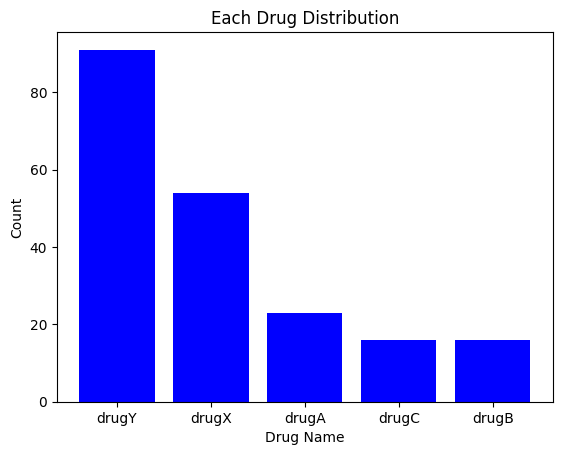

In [24]:
#Visualization which drug is higher in distribution in datasets 
category_count = df['Drug'].value_counts()

#Visualize each drug count in dataset 
plt.bar(category_count.index, category_count.values, color='blue')
plt.xlabel('Drug Name')
plt.ylabel('Count')
plt.title('Each Drug Distribution')
plt.show()

### Data Modeling and Evaluation 
1. Modeling the datasets into independent and dependent variables
2. Split dataset into training and testing datasets 
3. Model Development 
4. Model Evaluation 

In [27]:
#Spliting model into independent and dependent variables 
Y = df['Drug']

X = df.drop(['Drug', 'drug_map'], axis= 1)

In [30]:
#Model Selection: Splitting model into training & testing 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

### Model Development 

1. Build a decision tree classifier.
2. At each split, choose the feature with the highest Information Gain (entropy-based). 
    - `Default: - Gini Impurity`
3. Stop the tree growth once it reaches depth 4 → prevents overfitting (tree pruning).

In [35]:
from sklearn.tree import DecisionTreeClassifier

#Train, tree model using entropy (Information Gain) and pruning = 4 (max_depth)
decision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4)
decision_tree.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
#Prediciton and Evaluation 
from sklearn.metrics import accuracy_score

y_prediction = decision_tree.predict(x_test)

#Evaluation
print(f"Model Evaluation: {100 * np.round(accuracy_score(y_test, y_prediction), 2)}%")

Model Evaluation: 100.0%


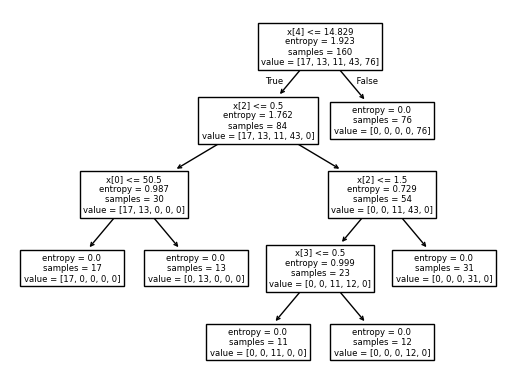

In [37]:
#Tree Visualization
from sklearn.tree import plot_tree
plot_tree(decision_tree)
plt.show()

In [38]:
#Model Development, evaluation and visualizaiton when pruning at level 3 

decision_at_level3 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3)
decision_at_level3.fit(x_train, y_train)

#Prediciton
y_pred_level3 = decision_at_level3.predict(x_test)

#Evaluation
print(f"Accuracy at level 3: {100 * np.round(accuracy_score(y_test, y_pred_level3), 2)}%")

Accuracy at level 3: 88.0%


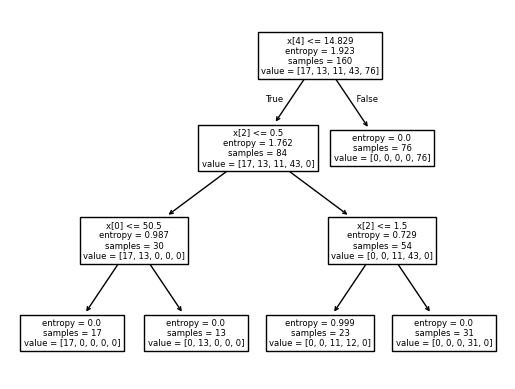

In [39]:
#Model Visualization in Level 3
plot_tree(decision_at_level3)
plt.show()